In [371]:
using DataFrames, CSV, CategoricalArrays
using Statistics, Clustering, LinearAlgebra
using Plots

In [6]:
filename = "./datasets/student-mat.csv"
df0 = DataFrame(CSV.File(filename))
df0[1:5,:]

5×33 DataFrame. Omitted printing of 26 columns
│ Row │ school  │ sex     │ age   │ address │ famsize │ Pstatus │ Medu  │
│     │ String3 │ String1 │ Int64 │ String1 │ String3 │ String1 │ Int64 │
├─────┼─────────┼─────────┼───────┼─────────┼─────────┼─────────┼───────┤
│ 1   │ GP      │ F       │ 18    │ U       │ GT3     │ A       │ 4     │
│ 2   │ GP      │ F       │ 17    │ U       │ GT3     │ T       │ 1     │
│ 3   │ GP      │ F       │ 15    │ U       │ LE3     │ T       │ 1     │
│ 4   │ GP      │ F       │ 15    │ U       │ GT3     │ T       │ 4     │
│ 5   │ GP      │ F       │ 16    │ U       │ GT3     │ T       │ 3     │

In [10]:
grades = df0[[:G1, :G2, :G3]]
head(grades)

6×3 DataFrame
│ Row │ G1    │ G2    │ G3    │
│     │ Int64 │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┤
│ 1   │ 5     │ 6     │ 6     │
│ 2   │ 5     │ 5     │ 6     │
│ 3   │ 7     │ 8     │ 10    │
│ 4   │ 15    │ 14    │ 15    │
│ 5   │ 6     │ 10    │ 10    │
│ 6   │ 15    │ 15    │ 15    │

#  California Housing

In [87]:
filename = "./datasets/housing.csv"
df = DataFrame(CSV.File(filename))
df[1:5,:]

5×10 DataFrame
 Row │ longitude  latitude  housing_median_age  total_rooms  total_bedrooms  p ⋯
     │ Float64    Float64   Float64             Float64      Float64?        F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   -122.23     37.88                41.0        880.0           129.0    ⋯
   2 │   -122.22     37.86                21.0       7099.0          1106.0
   3 │   -122.24     37.85                52.0       1467.0           190.0
   4 │   -122.25     37.85                52.0       1274.0           235.0
   5 │   -122.25     37.85                52.0       1627.0           280.0    ⋯
                                                               5 columns omitted

In [88]:
dropmissing!(df)

20433×10 DataFrame
   Row │ longitude  latitude  housing_median_age  total_rooms  total_bedrooms  ⋯
       │ Float64    Float64   Float64             Float64      Float64         ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │   -122.23     37.88                41.0        880.0           129.0  ⋯
     2 │   -122.22     37.86                21.0       7099.0          1106.0
     3 │   -122.24     37.85                52.0       1467.0           190.0
     4 │   -122.25     37.85                52.0       1274.0           235.0
     5 │   -122.25     37.85                52.0       1627.0           280.0  ⋯
     6 │   -122.25     37.85                52.0        919.0           213.0
     7 │   -122.25     37.84                52.0       2535.0           489.0
     8 │   -122.25     37.84                52.0       3104.0           687.0
     9 │   -122.26     37.84                42.0       2555.0           665.0  ⋯
    10 │   -122.25     37.84                52.0       3549.0           707.0
    11 │   -122.26     37.85                52.0       2202.0           434.0
   ⋮   │     ⋮         ⋮              ⋮                ⋮             ⋮         ⋱
 20424 │   -121.32     39.29                11.0       2640.0           505.0
 20425 │   -121.4      39.33                15.0       2655.0           493.0  ⋯
 20426 │   -121.45     39.26                15.0       2319.0           416.0
 20427 │   -121.53     39.19                27.0       2080.0           412.0
 20428 │   -121.56     39.27                28.0       2332.0           395.0
 20429 │   -121.09     39.48                25.0       1665.0           374.0  ⋯
 20430 │   -121.21     39.49                18.0        697.0           150.0
 20431 │   -121.22     39.43                17.0       2254.0           485.0
 20432 │   -121.32     39.43                18.0       1860.0           409.0
 20433 │   -121.24     39.37                16.0       2785.0           616.0  ⋯
                                                5 columns and 20412 rows omitted

In [89]:
ndf = names(df)

10-element Vector{String}:
 "longitude"
 "latitude"
 "housing_median_age"
 "total_rooms"
 "total_bedrooms"
 "population"
 "households"
 "median_income"
 "median_house_value"
 "ocean_proximity"

# Clustering 

In [90]:
pos = df[!, ndf[1:2]]

20433×2 DataFrame
   Row │ longitude  latitude 
       │ Float64    Float64  
───────┼─────────────────────
     1 │   -122.23     37.88
     2 │   -122.22     37.86
     3 │   -122.24     37.85
     4 │   -122.25     37.85
     5 │   -122.25     37.85
     6 │   -122.25     37.85
     7 │   -122.25     37.84
     8 │   -122.25     37.84
     9 │   -122.26     37.84
    10 │   -122.25     37.84
    11 │   -122.26     37.85
   ⋮   │     ⋮         ⋮
 20424 │   -121.32     39.29
 20425 │   -121.4      39.33
 20426 │   -121.45     39.26
 20427 │   -121.53     39.19
 20428 │   -121.56     39.27
 20429 │   -121.09     39.48
 20430 │   -121.21     39.49
 20431 │   -121.22     39.43
 20432 │   -121.32     39.43
 20433 │   -121.24     39.37
           20412 rows omitted

In [91]:
pos = Array(pos)

scatter(pos[:,1], pos[:,2])

In [92]:
km_pos = kmeans(pos |> transpose, 2)

KmeansResult{Matrix{Float64}, Float64, Int64}([-121.71717106027161 -118.00721705295265; 37.956934153988726 33.94065724919654], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0.26891238547614194, 0.26223317283802317, 0.2847850135076442, 0.2953415923002467, 0.2953415923002467, 0.2953415923002467, 0.29758027538264287, 0.29758027538264287, 0.3083368541774689, 0.29758027538264287  …  1.9348094009219494, 1.9859072989565902, 1.7693609744892456, 1.5554843864010763, 1.7488446581483004, 2.7130731101278798, 2.6075133725826163, 2.417102049854293, 2.327667837802437, 2.2244473059254233], [8611, 11822], [8611, 11822], 26335.865382910208, 4, true)

In [93]:
df[!, "pos"] = km_pos.assignments
ndf = names(df)

11-element Vector{String}:
 "longitude"
 "latitude"
 "housing_median_age"
 "total_rooms"
 "total_bedrooms"
 "population"
 "households"
 "median_income"
 "median_house_value"
 "ocean_proximity"
 "pos"

In [206]:
CategoricalArray(df[!, "ocean_proximity"]) |> levels

5-element Vector{String15}:
 "<1H OCEAN"
 "INLAND"
 "ISLAND"
 "NEAR BAY"
 "NEAR OCEAN"

In [97]:
df[!, :lv_op] = levelcode.(CategoricalArray(df[!, "ocean_proximity"]))
ndf = names(df)

12-element Vector{String}:
 "longitude"
 "latitude"
 "housing_median_age"
 "total_rooms"
 "total_bedrooms"
 "population"
 "households"
 "median_income"
 "median_house_value"
 "ocean_proximity"
 "pos"
 "lv_op"

In [98]:
name_of_y = :median_house_value
names_of_x = Symbol.(ndf[3:8])
names_of_z = Symbol.(ndf[11 : end])
dfy = df[!, name_of_y]
dfX = df[!, names_of_x]
dfZ = df[!, names_of_z]
dfZ[1:5,:]

5×2 DataFrame
 Row │ pos    lv_op 
     │ Int64  Int64 
─────┼──────────────
   1 │     1      4
   2 │     1      4
   3 │     1      4
   4 │     1      4
   5 │     1      4

# GLM fitting

In [99]:
using GLM

In [100]:
formula = Term(name_of_y) ~ sum([Term(x) for x in names_of_x])

FormulaTerm
Response:
  median_house_value(unknown)
Predictors:
  housing_median_age(unknown)
  total_rooms(unknown)
  total_bedrooms(unknown)
  population(unknown)
  households(unknown)
  median_income(unknown)

In [101]:
model = lm(formula, df[1:2000,:])

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

median_house_value ~ 1 + housing_median_age + total_rooms + total_bedrooms + population + households + median_income

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                           Coef.  Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)         -24763.6      5721.25     -4.33    <1e-04  -35983.9      -13543.4
housing_median_age    1206.56       98.1291   12.30    <1e-32    1014.11       1399.01
total_rooms              0.56757     2.35607   0.24    0.8097      -4.05305       5.18819
total_bedrooms          13.1151     22.4963    0.58    0.5600     -31.0037       57.2339
population             -35.7155      4.34982  -8.21    <1e-15     -4

# QGPLSIM fitting

In [412]:
include("qgplsim.ji")
include("supportFunctions.ji")

m2 (generic function with 1 method)

In [379]:
n, = size(dfy)
ntrain = 2000
ntest = 1000

1000

In [380]:
indn = Array(1:n)

ind = rand(indn, ntrain)

X = Array(dfX)[ind,1:6]
yr = Array(dfy)[ind] /10000
Zr = Array(dfZ)[ind, :]
# Z = [ones(506) Z]
# Z = zeros(506)
Xr = (X - repeat(minimum(X, dims = 1), ntrain, 1))./ (repeat(maximum(X, dims = 1), ntrain, 1) - repeat(minimum(X, dims = 1), ntrain, 1))
Xr = Xr .* 2 .- 1
Xr = Xr .* 3
minimum(Xr, dims = 1)

1×6 Matrix{Float64}:
 -3.0  -3.0  -3.0  -3.0  -3.0  -3.0

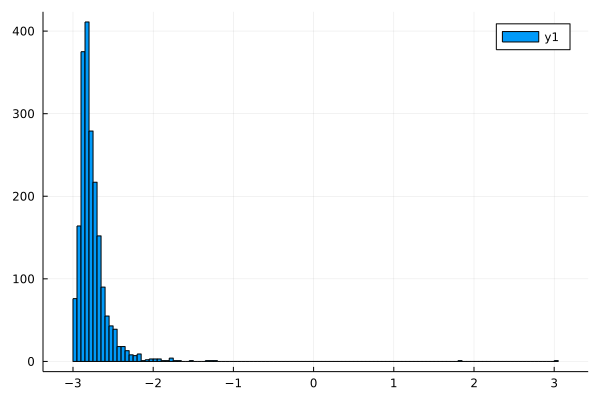

In [391]:
train_data = [Xr Zr yr]

histogram(train_data[:,4])

In [392]:
var(train_data, dims = 1)[1:6]

6-element Vector{Float64}:
 2.2240428978489244
 0.17109954524257495
 0.17124525861707932
 0.0580027670492051
 0.16198706985886202
 0.5968279833912784

In [417]:
qsmodel = qgplsim.model(Xr, Zr, yr)
@time qgplsim.estimator(qsmodel)

[0.0050666815634824915, 0.0050666815634824915, 0.0050666815634824915, 0.0050666815634824915, 0.0050666815634824915, 0.0050666815634824915]
[0.0008764973421640966, 0.0008764973421640966, 0.0008764973421640966, 0.0008764973421640966, 0.0008764973421640966, 0.0008764973421640966]
[0.004968591870325005, 0.004968591870325005, 0.004968591870325005, 0.004968591870325005, 0.004968591870325005, 0.004968591870325005]
[0.002194928055338074, 0.002194928055338074, 0.002194928055338074, 0.002194928055338074, 0.002194928055338074, 0.002194928055338074]
[0.0035730293021556535, 0.0035730293021556535, 0.0035730293021556535, 0.0035730293021556535, 0.0035730293021556535, 0.0035730293021556535]
[0.0026434522104292887, 0.0026434522104292887, 0.0026434522104292887, 0.0026434522104292887, 0.0026434522104292887, 0.0026434522104292887]
[0.004730610747435301, 0.004730610747435301, 0.004730610747435301, 0.004730610747435301, 0.004730610747435301, 0.004730610747435301]
 12.235283 seconds (52.93 M allocations: 39.7

([0.0, -0.22472979359124015, -0.19072883669689006, -0.30366096851496166, -0.34792886005335194, 0.8365731021657462], [-0.12553549826261085, -0.027290322141574102], [0.0; -0.007759432778886657; … ; -0.004187451673411214; -0.008332380446322597], [-0.3482139486602826, 2.3912210909001326])

In [418]:
using Plots

ind0 = rand(indn, ntest)

X = Array(dfX)[ind0,1:6]
yt = Array(dfy)[ind0] /10000
Zt = Array(dfZ)[ind0, :]
Xt = (X - repeat(minimum(X, dims = 1), ntest, 1))./ (repeat(maximum(X, dims = 1), ntest, 1) - repeat(minimum(X, dims = 1), ntest, 1))
Xt = Xt .* 2 .- 1
Xt = Xt .* 3

v1 = Xt * qsmodel.alpha
yp1 = qgplsim.predict(qsmodel, Xt, Zt)
norm(yp1 - yt)

287.2080093861866

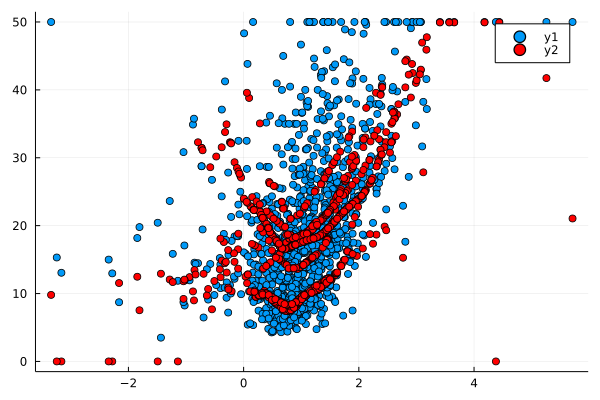

In [419]:
scatter(v1, yt)
scatter!(v1, yp1, color = "red")

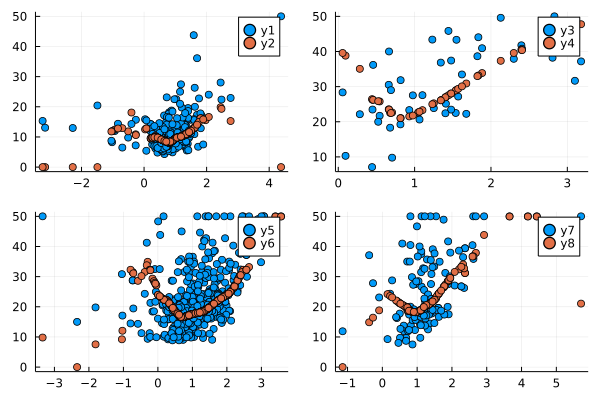

In [420]:

fig = plot(layouts = (2,2))
categ, index = collection(Zt)
for k in 1:4
    pk = fig.subplots[k]
    zk = categ[k]
    indk = index[zk]
    vk = v1[indk]
    ypk = yp1[indk]
    ytk = yt[indk]
    scatter!(pk, vk, ytk)
    scatter!(pk, vk, ypk)

end
fig

In [388]:
ht = rand(10) .- 0.4

10-element Vector{Float64}:
  0.45030665058587804
 -0.03726978797464453
  0.34641505352532176
  0.03800487022940946
  0.15425199812562618
 -0.3671358319197241
 -0.3754446904220031
  0.5974496724670321
 -0.11915146721846204
  0.30344445590694746

In [389]:
ht .> 0.2

10-element BitVector:
 1
 0
 1
 0
 0
 0
 0
 1
 0
 1